In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [9]:
img = cv2.imread('12.jpg')
img.shape

(6240, 4160, 3)

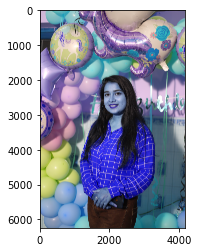

In [10]:
plt.imshow(img)

In [11]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(6240, 4160)

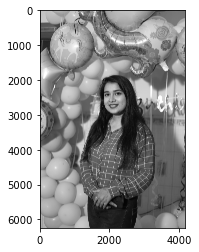

In [12]:
plt.imshow(gray, cmap='gray')

In [14]:
face_cascade = cv2.CascadeClassifier('./model/opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./model/opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[1685, 2099,  787,  787]])

In [15]:
(x,y,w,h) = faces[0]
x,y,w,h

(1685, 2099, 787, 787)

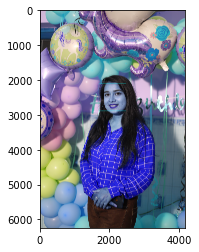

In [20]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,255),6)
plt.imshow(face_img)

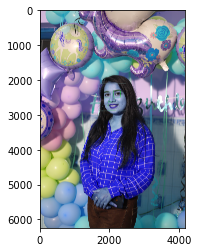

In [21]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

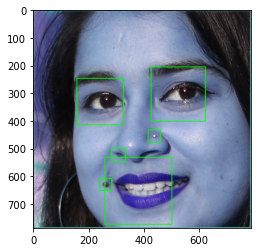

In [22]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [23]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

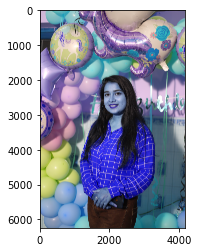

In [24]:
original_image = cv2.imread('12.jpg')
plt.imshow(original_image)

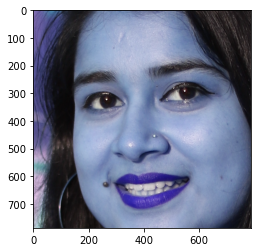

In [40]:
cropped_image = get_cropped_image_if_2_eyes('12.jpg')
plt.imshow(cropped_image)

In [41]:
path_to_data = "./model/data/"
path_to_cr_data = "./model/data/cropped/"

In [42]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [43]:
img_dirs

['./model/data/Sad']

In [44]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [45]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1   

Sad
Generating cropped images in folder:  ./model/data/cropped/Sad
